<center>
<h1>Energía para electrones en una cadela lineal (1D) monoatómica calculada con la aproximación <i>Tight-Bindig</i> (TBA)</h1>
</center>

<div align="right">Por David A. Miranda, Ph.D<br>2020</div>

La aproximación <i>Tight-Binding</i> (TBA), también conocida como combinación lineal de orbitales moleculares (LCAO) o método de <a href="https://journals.aps.org/pr/abstract/10.1103/PhysRev.94.1498" target="_blank">Slater-Koster</a>, consiste en expandir las funciones de onda de un cristal en una base formada por funciones de onda de orbitales atómicos $\phi_l(\vec{r})$, donde $l$ es el número cuántico de momento angular, que puede tomar los valores $l=0 \rightarrow s, 1 \rightarrow p, 2 \rightarrow d, ...$


<h2> 1. Orbitales atómicos  $s$ y $p$ para una cadena lineal (1D)</h2>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte

In [0]:
a0 = cte.physical_constants['Bohr radius'][0]

def s_bas(x, a0=a0):
    rho = np.abs(x/a0)
    y = np.exp(-rho)
    return y

def p_bas(x, a0=a0):
    rho = x/a0
    y = rho*np.exp(-np.abs(rho)/2)
    return y

x_norm = np.linspace(-500*a0, 500*a0, 10000)
s_norm = np.sqrt(np.trapz(s_bas(x_norm)**2,x=x_norm))
p_norm = np.sqrt(np.trapz(p_bas(x_norm)**2,x=x_norm))

def phi_s(x, a0=a0, s_norm = s_norm):
    return s_bas(x, a0=a0)/s_norm

def phi_p(x, a0=a0, p_norm = p_norm):
    return p_bas(x, a0=a0)/p_norm

Text(0.5, 1.0, '$\\langle\\phi_s|\\phi_s\\rangle = 1.00, \\langle\\phi_p|\\phi_p\\rangle = 1.00, \\langle\\phi_s|\\phi_p\\rangle = 0.00$')

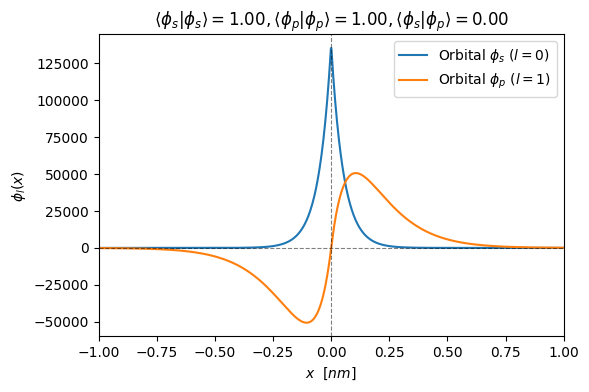

In [3]:
x = np.linspace(-1e-9, 1e-9, 1000)

plt.figure(dpi=100)
plt.plot(1e9*x, phi_s(x), label=r'Orbital $\phi_s$ $(l=0)$')
plt.plot(1e9*x, phi_p(x), label=r'Orbital $\phi_p$ $(l=1)$')
ax = list(plt.axis())
x_range = [1e9*x.min(), 1e9*x.max()]
plt.axis(x_range+ax[2:])
plt.plot([0,0], ax[2:],'--k',  alpha=0.5, lw=0.8)
plt.plot(x_range, [0, 0],'--k', alpha=0.5, lw=0.8)
plt.xlabel(r'$x$  $[nm]$')
plt.ylabel(r'$\phi_l(x)$')
plt.legend()

phi_s_norm = np.trapz(phi_s(x)**2,x=x)
phi_p_norm = np.trapz(phi_p(x)**2,x=x)
phi_s_dot_phi_p = np.trapz(phi_s(x)*phi_p(x),x=x)

title = r'$\langle\phi_s|\phi_s\rangle = %0.2f, \langle\phi_p|\phi_p\rangle = %0.2f, \langle\phi_s|\phi_p\rangle = %0.2f$' % (phi_s_norm, phi_p_norm, phi_s_dot_phi_p)
plt.title(title)

<h2>2. Red lineal (1D)</h2>
La red lineal (1D) está conformada por puntos en el espacio tal que dos posiciones consecutivas están separadas una cierta distancia $a$ conocida como parámetro de celda.

Para este ejemplo numérico se asumirá un parámetro de celda igual a 31 veces el radio de Bohr, $$a=31a_0= 31\frac{4\pi\varepsilon_0\hbar^2}{m_eq_e^2}$$

([], <a list of 0 Text yticklabel objects>)

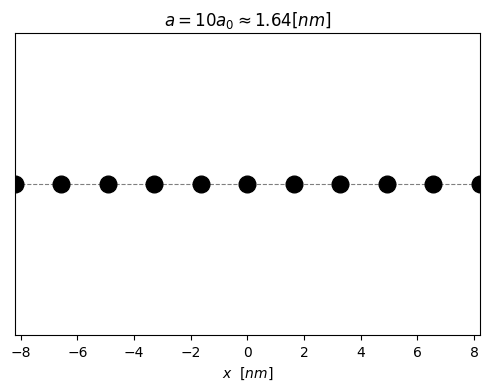

In [4]:
a = 31*a0
N = 10

def plot_atoms(N, a=a, markersize=12):
    x = np.arange(-N*a/2, N*a/2+a, a)
    plt.plot(1e9*x, 0*x, 'ko', markersize=markersize)
    plt.xlabel(r'$x$  $[nm]$')

plt.figure(dpi=100)
x_range = [-1e9*N*a/2, (1e9*N*a/2+a)]
plt.plot(x_range, [0,0],'--k', alpha=0.5, lw=0.8)
plot_atoms(N)
plt.title(r'$a=10a_0\approx%0.2f [nm]$' % (1e9*a))
ax = list(plt.axis())
plt.axis(x_range+ax[2:])
plt.yticks([])

<h2>3. Teorema de Bloch y funciones de onda de la base, $\chi_{\vec{h}li}$</h2>
Para calcular la energía de los electrones dentro del cristal es necesario considerar la periodicidad del mismo.  Dicha periodicidad también se ve reflejada en la energía potencial que confina a los electrones.  Como para un potencial periódico se cumple el teorema de Bloch, es necesario construir una base con los orbitales atómicos $\phi_l$ que cumpla con dicho teorema.  Si se suponen $N$ celdas unitarias primitivas (PUC), donde $i$ representa al $i$-ésimo átomo ubicado en $\vec{t}_i$ en la PUC y $l$ al número cuántico de momento angular, entonces, la siguente base cumple con el teorema de Bloch: $$\chi_{\vec{k}li}\left(\vec{r}\right) = \frac{1}{\sqrt{N}}\sum_{R'}e^{j\vec{k}\cdot\vec{R}'}\phi_l\left(\vec{r}-\vec{t}_i-\vec{R}'\right)$$
Note que la suma sobre $\vec{R}'$ implica que se toman todos los puntos de la red formada por $N$ PUC.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


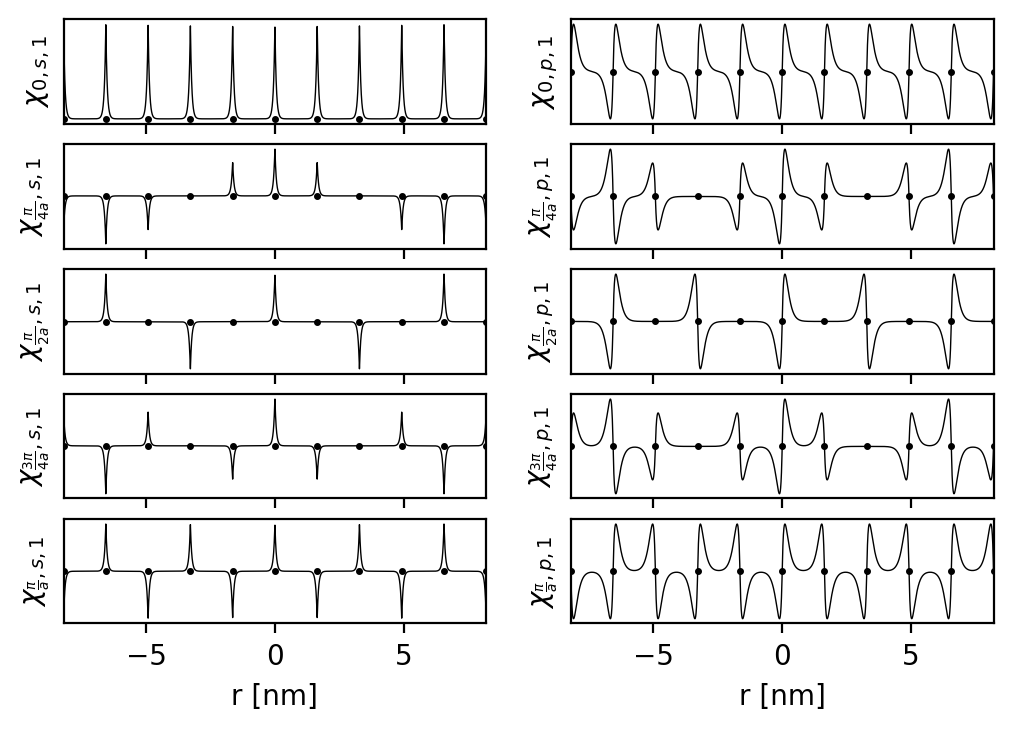

In [5]:
N = 10
r = np.linspace(-N*a/2, N*a/2, 5000)
def chi(k, l, N=N, a=a):
    phi = phi_s if l=='s' else phi_p if l=='p' else None
    t_i = 0
    base = [np.exp(1j*k*n*a)*phi(r-t_i-n*a) for n in np.arange(-N/2, N/2+1, 1)]
    return sum(base)

k_factors = [0, 0.25, 0.5, 0.75, 1]
k_len = len(k_factors)
plt.figure(1, dpi=200)
index = -1
for k_n in k_factors:
    index += 2
    num, den = float(k_n).as_integer_ratio()
    num_str = str(num) if num > 1 else ''
    den_str = str(den) if den > 1 else ''
    k_str = r'\frac{%s\pi}{%sa}' % (num_str, den_str)
    k_str = 0 if num == 0 else k_str

    k = k_n*np.pi/a
    plt.subplot(k_len, 2, index)
    plot_atoms(N, markersize=1.5)
    plt.plot(1e9*r, chi(k, 's'),'k', lw=0.5)
    plt.xlabel('r [nm]')
    plt.ylabel(r'$\chi_{%s,s,1}$' % k_str)
    plt.yticks([])
    Dr = [1e9*min(r), 1e9*max(r)]
    ax = plt.axis()
    plt.axis(Dr+list(ax)[2:])


    plt.subplot(k_len, 2, index+1)
    plot_atoms(N, markersize=1.5)
    plt.plot(1e9*r, chi(k, 'p'),'k', lw=0.5)
    plt.xlabel('r [nm]')
    plt.ylabel(r'$\chi_{%s,p,1}$' % k_str)
    plt.yticks([])
    ax = plt.axis()
    plt.axis(Dr+list(ax)[2:])

<h2>4. Hamiltoniano de una partícula $\hat{H}^{SP}$ y funciones de onda del cristal, $\Psi_\vec{k}^{(n)}$</h2>
A partir de la base formada por las funciones de onda de Bloch $\chi_{\vec{k}li}$, se pueden construir, a partir de la combinacion lineal de las funciones de onda de la base, las funciones de onda que describen a los electrónes del cristal, $\Psi_\vec{k}^{(n)}$.  

$$\Psi_\vec{k}^{(n)}=\sum_{l,i}c_{\vec{k}li}^{(n)}\chi_{\vec{k}li}\left(\vec{r}\right)$$

Para encontrar los coeficientes asociados a la combinación lineal, se debe resolver el problema de una partícula dado por

$$\hat{H}^{SP}\Psi_\vec{k}^{(n)}=\epsilon_\vec{k}^{(n)}\Psi_\vec{k}^{(n)}$$

En términos de ket de la base, la anterior ecuación se escribe como,

$$\sum_{l,i}\hat{H}^{SP}c_{\vec{k}li}^{(n)}\left|\chi_{\vec{k}li}\right\rangle=\epsilon_\vec{k}^{(n)}\sum_{l,i}c_{\vec{k}li}^{(n)}\left|\chi_{\vec{k}li}\right\rangle$$

Al multiplicar por el bra $\left\langle \chi_{\vec{k}'mj}\right|$ y reordenando términos, se llega a la ecuación secular,

$$\sum_{l,i}\left\{\left\langle \chi_{\vec{k}'mj}\right|\hat{H}^{SP}\left|\chi_{\vec{k}li}\right\rangle-\epsilon_\vec{k}^{(n)}\left\langle \chi_{\vec{k}'mj}\middle|\chi_{\vec{k}li}\right\rangle\right\}c_{\vec{k}li}^{(n)} = 0$$

Para el caso de una red lineal (1D) monoatómica, 

$$\chi_{\vec{k}l1}(x) = \frac{1}{\sqrt{N}}\sum_{\eta}e^{jk\eta a}\phi_l(x-\eta a)$$

Por lo tanto, la ecuación secular toma la siguiente forma.

$$\sum_{\eta} e^{jk\eta a} \left\{\left\langle \phi_l(x) \right|\hat{H}^{SP}\left|\phi_l(x-\eta a)\right\rangle-\epsilon_\vec{k}^{(n)}\left\langle \phi_l(x)\middle|\phi_l(x-\eta a)\right\rangle\right\}c_{\vec{k}li}^{(n)} = 0$$

Como la base construida es ortogonal, se tiene que,

$$\left\langle \phi_l(x)\middle|\phi_l(x-\eta a)\right\rangle = \delta_{\eta,0}$$

$$\left\langle \phi_l(x) \right|\hat{H}^{SP}\left|\phi_l(x-\eta a)\right\rangle = \epsilon_l\delta_{\eta,0}+t_l\delta_{\eta\pm1}$$

Donde $\epsilon_\vec{k}^{(n)}\delta_{\eta,0}$ es el aporte de los átomos que conforman el cristal y $t_l\delta_{\eta\pm1}$, corresponde a la interacción entre vecinos más cercanos.

Entonces, la ecuación secular se transforma en,

$$\sum_{\eta} e^{jk\eta a} \left[\left(\epsilon_l\delta_{\eta,0}+t_l\delta_{\eta\pm1}\right)-\epsilon_\vec{k}^{(n)}\delta_{\eta,0}\right]c_{\vec{k}li}^{(n)} = 0$$

Note que los delta de Kronecker permiten extraer solo ciertos términos de la sumatoria: 

$$\sum_{\eta} e^{jk \eta a} \left[\epsilon_l\delta_{\eta,0}-\epsilon_\vec{k}^{(n)}\delta_{\eta,0}\right]c_{\vec{k}li}^{(n)} + \sum_{\eta=1}^N e^{jk\eta a} \left(t_l\delta_{\eta\pm1}\right)c_{\vec{k}li}^{(n)} = 0$$

Note que,

$$\sum_{\eta=1}^N e^{jk\eta a} t_l\delta_{\eta\pm1}= e^{jka} t_l+ e^{-jka} t_l = 2t_lcos(ka)$$

$$\sum_{\eta} e^{jk \eta a} \left[\epsilon_l\delta_{\eta,0}-\epsilon_\vec{k}^{(n)}\delta_{\eta,0}\right] = \epsilon_l - \epsilon_\vec{k}^{(n)}$$

Por lo tanto, la ecuación secular queda de la siguiente manera:

$$\left[\epsilon_l - \epsilon_\vec{k}^{(n)} + 2t_lcos(ka)\right] c_{\vec{k}li}^{(n)} = 0$$


La solución de esta ecuación se obtiene cuando:
$$\epsilon_\vec{k}^{(n)} = \epsilon_l + 2t_lcos(ka)$$

Donde, para este caso, $l=0 \rightarrow s, 1 \rightarrow p, 2 \rightarrow d, ...$

[-1, 1, -1.6999995055317445, 2.6999896161666364]

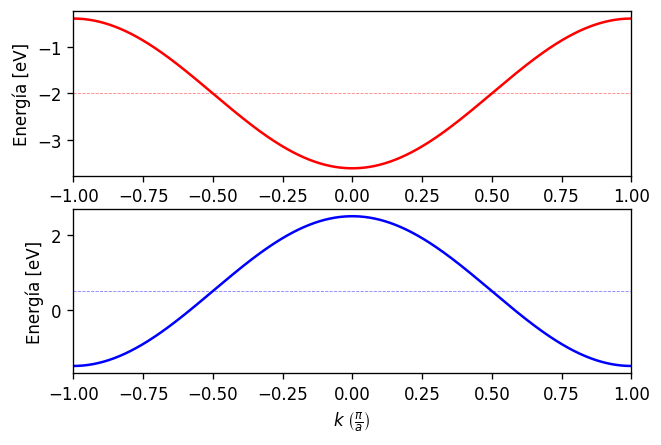

In [6]:
def tba_energy_1D_1e(k, l, E_l, t_l):
    phi = phi_s if l == 's' else phi_p if l == 'p' else None
    return E_l + 2*t_l*np.cos(k*a)

k = np.linspace(-np.pi/a, np.pi/a, 1000)
E_s = -2.0 #eV
t_s = -0.8 #eV
E_p =  0.5 #eV 
t_p =  1.0 #eV

Dr = [-1, 1]

plt.figure(dpi=120)
plt.subplot(2,1,1)
plt.plot(k*a/np.pi, tba_energy_1D_1e(k, 's', E_s, t_s), 'r', label=r'$l=s$')
plt.plot(Dr, 2*[E_s], 'r--', lw=0.5, alpha=0.5)
plt.ylabel('Energía [eV]')
ax = plt.axis()
plt.axis(Dr+list(ax)[2:])

plt.subplot(2,1,2)
plt.plot(k*a/np.pi, tba_energy_1D_1e(k, 'p', E_p, t_p), 'b', label=r'$l=p$')
plt.plot(Dr, 2*[E_p], 'b--', lw=0.5, alpha=0.5)
plt.ylabel('Energía [eV]')
plt.xlabel(r'$k$ $\left(\frac{\pi}{a}\right)$')
ax = plt.axis()
plt.axis(Dr+list(ax)[2:])

End! By the moment.